In [2]:
# === Standard Library ===
import math
import random
import time
import heapq
import itertools
from collections import defaultdict, deque
from itertools import combinations
from typing import Any, Tuple, Dict, List, Set, Sequence, Union
# === Third-Party Libraries ===

# --- Scientific Computing ---
import numpy as np
import pandas as pd
import scipy.sparse as sp
from scipy.optimize import linprog

# --- Plotting ---
import matplotlib.pyplot as plt

# --- Parallel Processing ---
from joblib import Parallel, delayed
from tqdm import tqdm

# --- Graph Processing ---
import networkx as nx

# --- JIT Compilation ---
from numba import njit, prange

In [9]:
path1 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_ER_100_10_REGA.csv"
path2 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_BA_100_10_REGA.csv"
path3 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_SW_100_10_REGA.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [10]:
path4 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_BA_100_10_first_5.csv"
path5 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_ER_100_10_first_5.csv"
path6 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\Result_heuristics_all_SW_100_10_first_5.csv"

df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

In [14]:
path7 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_ER_100_10_greedies_opt.csv"
path8 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_BA_100_10_greedies_opt.csv"
path9 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_SW_100_10_greedies_opt.csv"

df7 = pd.read_csv(path7)
df8 = pd.read_csv(path8)
df9 = pd.read_csv(path9)

In [12]:
sub_df1 = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=False)
sub_df1['epc_std'] = 0.0
sub_df1

,model,p,algo,time,epc,epc_std
0,ER,0.0,REGA,7.089809,0.00000,0.0
1,ER,0.1,REGA,17.369625,20.05155,0.0
2,ER,0.2,REGA,43.166783,53.58420,0.0
3,ER,0.3,REGA,135.994652,133.85070,0.0
4,ER,0.4,REGA,490.451155,307.83825,0.0
...,...,...,...,...,...,...
50,SW,1.0,Degree-based,0.001243,3918.65760,0.0
51,SW,1.0,Betweenness,0.028927,4005.00000,0.0
52,SW,1.0,PageRank,0.005488,3915.64800,0.0
53,SW,1.0,Greedy_ES,139.771202,3825.77710,0.0


In [15]:
sub_df2 = pd.concat([df7, df8, df9], ignore_index=False)
sub_df2 

,model,p,algo,time,epc,epc_std
0,ER,0.0,Greedy_ES_initial,2.667464,0.000000,0.000000
1,ER,0.0,Greedy_ES_final,4.447333,0.000000,0.000000
2,ER,0.0,Greedy_MIS_initial,3.612534,0.000000,0.000000
3,ER,0.0,Greedy_MIS_final,55.021285,0.000000,0.000000
4,ER,0.1,Greedy_ES_initial,0.511535,16.433100,0.000000
...,...,...,...,...,...,...
27,SW,0.6,Greedy_MIS_final,3902.432926,1691.393760,64.481810
28,SW,0.7,Greedy_ES_initial,19.153481,3042.441406,0.000000
29,SW,0.7,Greedy_ES_final,537.850837,2400.097500,0.000000
30,SW,0.7,Greedy_MIS_initial,19.859958,2950.429230,75.479263


In [17]:
final_df = pd.concat([sub_df1, sub_df2], ignore_index=False)
final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df

,model,p,algo,time,epc,epc_std
0,ER,0.0,REGA,7.089809,0.000000,0.000000
1,ER,0.1,REGA,17.369625,20.051550,0.000000
2,ER,0.2,REGA,43.166783,53.584200,0.000000
3,ER,0.3,REGA,135.994652,133.850700,0.000000
4,ER,0.4,REGA,490.451155,307.838250,0.000000
...,...,...,...,...,...,...
27,SW,0.6,Greedy_MIS_final,3902.432926,1691.393760,64.481810
28,SW,0.7,Greedy_ES_initial,19.153481,3042.441406,0.000000
29,SW,0.7,Greedy_ES_final,537.850837,2400.097500,0.000000
30,SW,0.7,Greedy_MIS_initial,19.859958,2950.429230,75.479263


In [22]:
final_df.algo.unique()

array(['REGA', 'Degree-based', 'Betweenness', 'PageRank', 'Greedy_ES',
       'Greedy_MIS', 'Greedy_ES_initial', 'Greedy_ES_final',
       'Greedy_MIS_initial', 'Greedy_MIS_final'], dtype=object)

In [34]:
name_map = {
  'Greedy_MIS_final': 'Greedy_MIS_local',
  'Greedy_ES_final':  'Greedy_ES_local',
  'Greedy_MIS_initial': 'Greedy_MIS_naive',
  'Greedy_ES_initial':  'Greedy_ES_naive',
}

final_df['algo'] = final_df['algo'].replace(name_map)

final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df.algo.unique()

array(['REGA', 'Degree-based', 'Betweenness', 'PageRank', 'Greedy_ES',
       'Greedy_MIS', 'Greedy_ES_naive', 'Greedy_ES_local',
       'Greedy_MIS_naive', 'Greedy_MIS_local'], dtype=object)

In [3]:
df = pd.read_csv("/home/tuguldurb/Development/Research/SCNDP/src/SCNDP/src/notebooks/Greedy_heuristics/final/Result_heuristics_all_SW_100_10_greedies_opt.csv")
df

,model,p,algo,time,epc,epc_std
0,SW,0.0,Greedy_ES_initial,0.243413,0.000000,0.000000
1,SW,0.0,Greedy_ES_final,2.322709,0.000000,0.000000
2,SW,0.0,Greedy_MIS_initial,3.301325,0.000000,0.000000
3,SW,0.0,Greedy_MIS_final,52.325949,0.000000,0.000000
4,SW,0.1,Greedy_ES_initial,0.558720,19.219950,0.000000
5,SW,0.1,Greedy_ES_final,13.627242,19.052550,0.000000
6,SW,0.1,Greedy_MIS_initial,3.312176,19.349820,0.251599
7,SW,0.1,Greedy_MIS_final,129.432170,19.021050,0.086147
8,SW,0.2,Greedy_ES_initial,0.871850,53.215649,0.000000
9,SW,0.2,Greedy_ES_final,15.551077,52.286850,0.000000


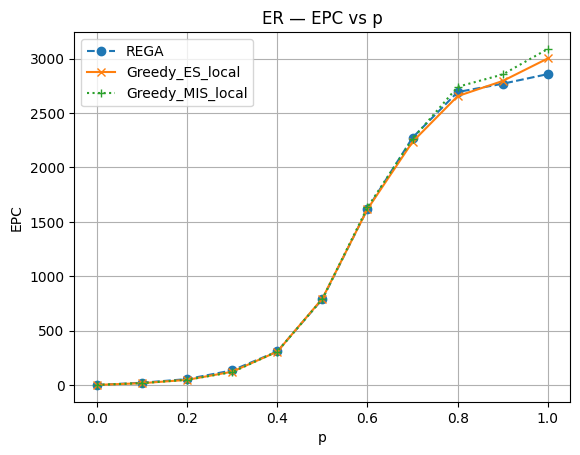

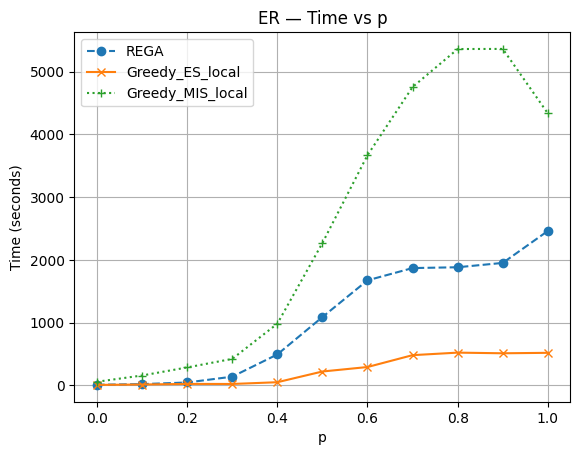

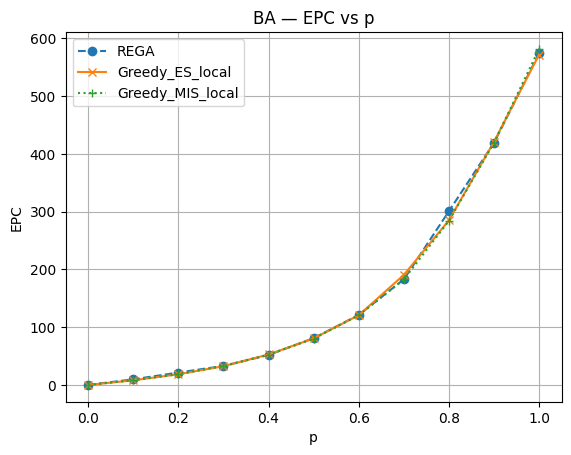

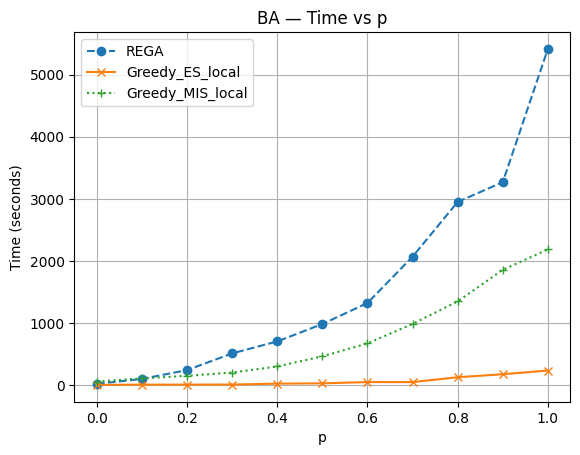

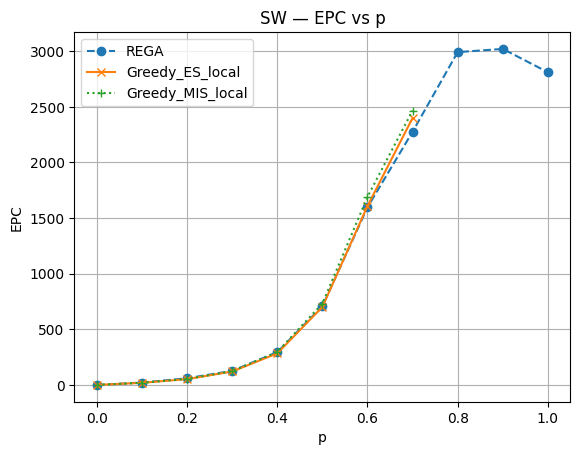

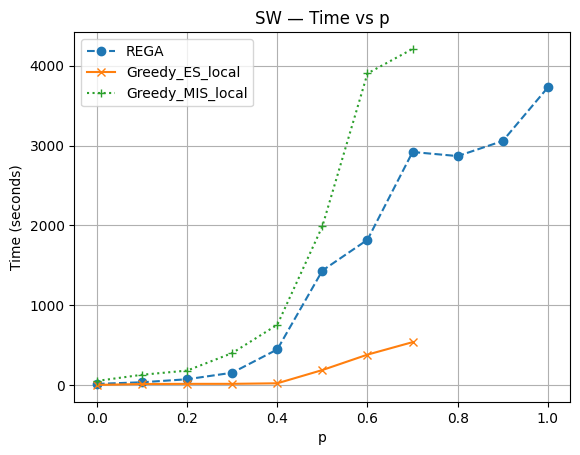

In [44]:
ROOT_PATH = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\plots"

sub_path = r"with_greedys_REGA"
suffix = "with_greedys_REGA"

import os

os.makedirs(os.path.join(ROOT_PATH, sub_path), exist_ok=True)

selected_algos = [
    # "Degree-based",
    "REGA",
    # "PageRank",
    "Greedy_ES_local", 
    # "Betweenness",
    "Greedy_MIS_local"
    ]

marker_map = {
    "Degree-based":    "x",
    "REGA":          "o",
    "Pagerank":      "*",
    "Betweenness":   "+",
    "Greedy_ES_local": "x",
    "Greedy_MIS_local": "+",
}

linestyle_map = {
    "Degree-based":  ":",
    "REGA":          "--",
    "Pagerank":      "-.",
    "Betweenness":   "-",
    "Greedy_MIS_local": ":",
}


for name in ["ER","BA","SW"]:
    df_m = final_df[final_df.model==name]
    plt.figure()
    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.epc,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — EPC vs p")
    plt.xlabel("p"); plt.ylabel("EPC")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_epc_vs_p_{suffix}.png")
    plt.show()

    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.time,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — Time vs p")
    plt.xlabel("p"); plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_time_vs_p_{suffix}.png")
    plt.show()

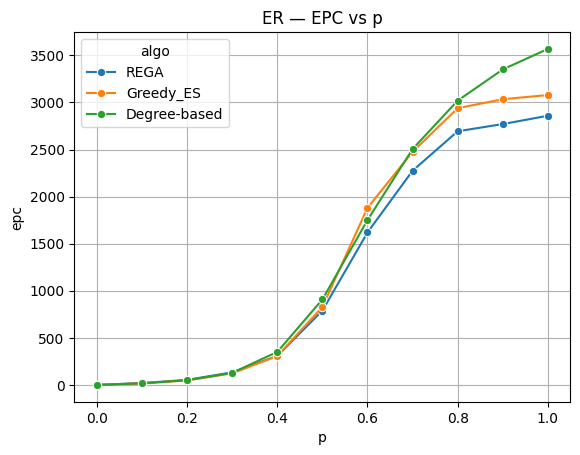

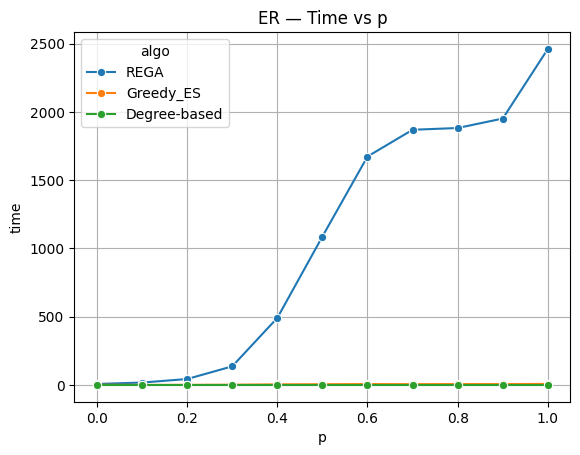

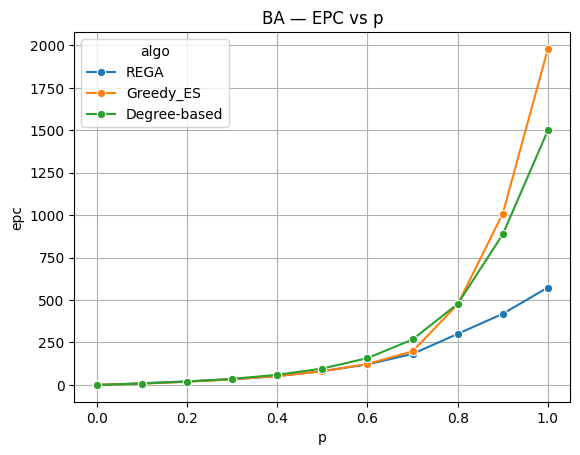

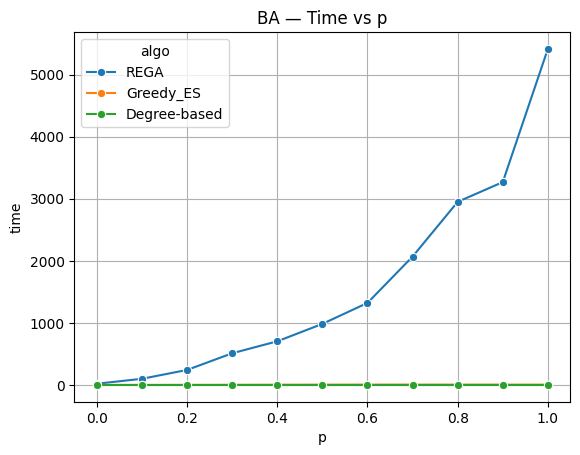

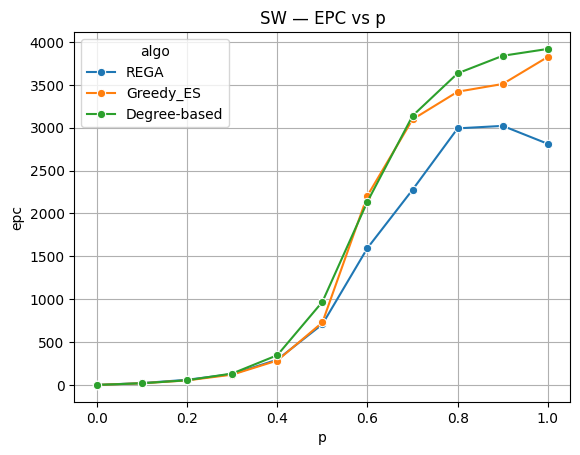

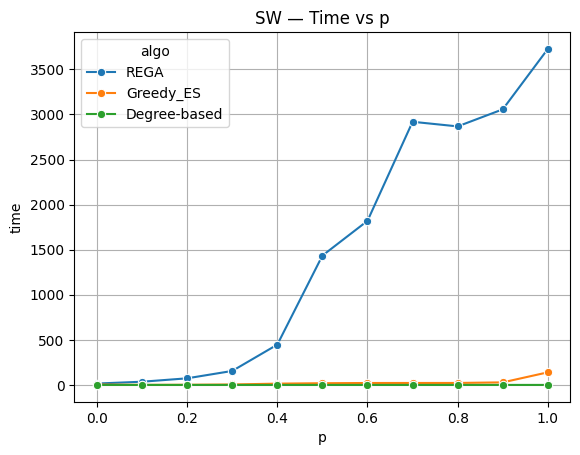

In [20]:
import seaborn as sns

ROOT_PATH = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\plots"
selected_algos = ["REGA", "Greedy_ES", "Degree-based"]
df_sel = final_df[final_df.algo.isin(selected_algos)]

for name in ["ER", "BA", "SW"]:
    df_m = df_sel[df_sel.model==name]

    # EPC
    plt.figure()
    sns.lineplot(
        data=df_m,
        x="p", y="epc",
        hue="algo", hue_order=selected_algos,
        marker="o"
    )
    plt.title(f"{name} — EPC vs p")
    plt.grid(True)
    plt.savefig(f"{ROOT_PATH}/{name}_epc_vs_p.png")

    # Time
    plt.figure()
    sns.lineplot(
        data=df_m,
        x="p", y="time",
        hue="algo", hue_order=selected_algos,
        marker="o"
    )
    plt.title(f"{name} — Time vs p")
    plt.grid(True)
    plt.savefig(f"{ROOT_PATH}/{name}_time_vs_p.png")

plt.show()
